Problem: What are the most important features that influence the success rate of the campaign?

In [1]:
# %% libraries
import numpy as np
import pandas as pd
import sklearn
import re
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date as dt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

import collections
import imblearn

In [2]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 0.5)

In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,3/1/2019,0,0,0,0,0,0,1,0,25,...,0,0,0,0,0,0,267388.65,114438.41,67997.5,3804921.27
1,3/2/2019,0,0,0,0,0,0,1,0,25,...,0,0,0,0,0,0,668799.75,302135.49,134966.5,5347859.81


In [4]:
print('Number of records :',data.shape[0])
print('Number of features :',data.shape[1])

Number of records : 1037
Number of features : 105


In [5]:
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

In [6]:
data.set_index(data["Date"], inplace = True)
data = data.drop("Date", axis = 1)
data.head()

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
Date,,,,,,,,,,,,,,,,,,,,,
3/1/2019,0,0,0,0,0,0,1,0,25,0,...,0,0,0,0,0,0,267388.65,114438.41,67997.5,3804921.27
3/2/2019,0,0,0,0,0,0,1,0,25,0,...,0,0,0,0,0,0,668799.75,302135.49,134966.5,5347859.81
3/3/2019,0,0,0,0,0,0,1,0,25,0,...,0,0,0,0,0,0,671177.75,299434.47,125703.0,5193938.29
3/4/2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,265077.82,123662.13,58639.5,1842761.07
3/5/2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,161678.91,64793.74,45278.5,3814992.83


## 1) Null values

In [7]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values']).T

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
#Null values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/len(data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 104 column(s).
There is/are 0 column(s) that has/have missing values.


,total_missing,perc_missing
Amount of Employee pricing % off,0,0.0
off Particular Item?,0,0.0
Amount of % Off Particular Item,0,0.0
Location Specific?,0,0.0
off 1st item?,0,0.0
...,...,...
Saskatchewan_C6_Stay at home requirements_1.0,0,0.0
WrittenSales,0,0.0
Margin,0,0.0
Traffic,0,0.0


In [9]:
data.columns

Index(['Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       'off HomeStore Specials?',
       ...
       'Saskatchewan_C1_School closing_2.0',
       'Saskatchewan_C1_School closing_3.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=104)

### Continous Features

In [10]:
df_amount= data[[ 
'WrittenSales',
'month',
'weekday',
'day',
'Amount of % Off Particular Item', 
'Amount of % off 1st item', 
'Amount of $ off conditional', 
'Amount of % off conditional',
'Amount of % Off Homestore Specials ',
'Amount of % off Reg Price Living, Dining, amd M. Bedroom ',
'Amount of % off rest of purchase ',
'Amount % off sectionals ',
'amount of % off sofa w/ full price loveseat ',
'Amount of % Accessories',
'Amount of % Off CLA ', 
'Amount of % Off JUV ',
'Amount of % Off OTB(occasional tables)', 
'Amount of % When Financing ', 
'Amount of % With Rest Test ',
'Amount % Off at 090', 
'Amount % off in AB', 
'Amount % off in GTA',
'Amount % off in MB', 
'Amount % Savings over $2499',
'Amount of %  Savings for $1499 or more',
'Amount of % Savings over $2000',  
'Amount of off reg priced furniture',
' Percent  Amount',  
'Amount of x GST Savings ',
'Amount x Tax Savings']]

# Linear Regression with Grid Search and RFE

In [35]:
X = data.iloc[:, 1:-4].values
y = data["WrittenSales"].values.reshape(-1,1)

X_df = data.iloc[:, 1:-4]

In [34]:
y

array([ 267388.65,  668799.75,  671177.75, ..., 1057772.56, 1353736.67,
        778688.29])

In [28]:

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [29]:
print(X_train.shape, y_train.shape)

(725, 99) (725, 1)


In [30]:
X_train

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X_df.columns)))}]

In [14]:
# step-3: perform grid search
# 3.1 specify model

lm = LinearRegression()
lm.fit(X_train, y_train)

prediction = lm.predict(X_test)
print(" {} nn score: {} ".format(3,lm.score(X_test,y_test)))


 3 nn score: -8.489734591565072e+26 


In [15]:
lm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [16]:
rfe = RFE(lm) 

# 3.2 call GridSearchCV()`
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [17]:
# fit the model
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
# print(cv_results)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


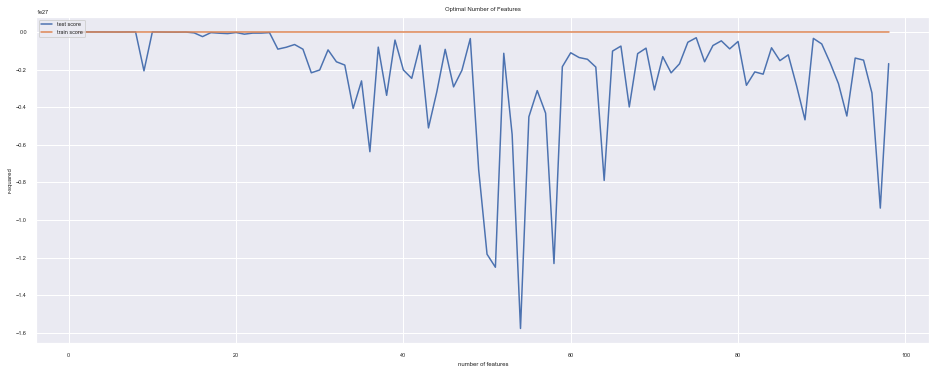

In [18]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [19]:
cv_results[["param_n_features_to_select","mean_train_score","mean_test_score"]]

,param_n_features_to_select,mean_train_score,mean_test_score
0,1,0.028267,-1.151846e-02
1,2,0.035519,-4.191386e-03
2,3,0.053530,8.744957e-03
3,4,0.056958,-2.292902e+21
4,5,0.077953,-1.764863e+23
...,...,...,...
93,94,0.489571,-1.387116e+26
94,95,0.491050,-1.498455e+26
95,96,0.487686,-3.243151e+26
96,97,0.486408,-9.367273e+26


In [36]:
n_features_optimal = cv_results["param_n_features_to_select"][cv_results["mean_test_score"] == cv_results["mean_test_score"].max()].values
n_features_optimal

array([8], dtype=object)

In [41]:
cv_results.sort_values(by = "mean_test_score", ascending = False )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.097300,0.005675,0.000399,0.000488,8,{'n_features_to_select': 8},-0.019554,-6.638884e-02,-9.378794e-03,8.672558e-02,...,1.861626e-02,6.481454e-02,1,0.097794,0.150000,0.000615,0.117591,0.129874,0.099175,0.052117
2,0.095488,0.004600,0.000000,0.000000,3,{'n_features_to_select': 3},-0.052757,-1.559434e-02,-1.210732e-02,5.701678e-02,...,8.744957e-03,4.594099e-02,2,0.056695,0.054996,0.000452,0.072278,0.083227,0.053530,0.028505
1,0.105637,0.005466,0.000199,0.000399,2,{'n_features_to_select': 2},-0.052733,-6.628921e-03,-1.029114e-02,5.701678e-02,...,-4.191386e-03,3.510822e-02,3,0.056684,0.000089,0.000352,0.072278,0.048190,0.035519,0.029838
0,0.103248,0.009763,0.000200,0.000399,1,{'n_features_to_select': 1},-0.051635,-6.794720e-03,-1.029114e-02,3.018872e-02,...,-1.151846e-02,2.618971e-02,4,0.056654,0.000174,0.000352,0.044611,0.039543,0.028267,0.023531
6,0.097516,0.009620,0.000398,0.000488,7,{'n_features_to_select': 7},-0.017007,-1.007122e+19,-6.895611e-03,8.679073e-02,...,-2.014243e+18,4.028486e+18,5,0.094226,0.149996,0.000433,0.117566,0.129276,0.098300,0.052149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.004423,0.004656,0.001609,0.003217,97,{'n_features_to_select': 97},0.274430,-1.785636e+27,-2.801831e+27,-8.908603e+24,...,-9.367273e+26,1.154050e+27,94,0.487989,0.540028,0.505440,0.470987,0.427595,0.486408,0.037247
49,0.064616,0.005732,0.000102,0.000204,50,{'n_features_to_select': 50},0.077312,-4.871357e+27,-6.974614e+26,-1.113301e+26,...,-1.181952e+27,1.859927e+27,95,0.258138,0.360672,0.334276,0.255536,0.254876,0.292700,0.045509
57,0.060937,0.005275,0.000201,0.000403,58,{'n_features_to_select': 58},0.280169,-5.244732e+27,-8.142048e+26,-3.327075e+25,...,-1.231527e+27,2.029396e+27,96,0.438368,0.483235,0.470658,0.440024,0.387652,0.443987,0.033084
50,0.062586,0.006517,0.001608,0.003215,51,{'n_features_to_select': 51},0.225357,-1.573514e+25,-2.685393e+26,-5.727001e+27,...,-1.251238e+27,2.240665e+27,97,0.317629,0.371272,0.414510,0.315321,0.325071,0.348761,0.038674


In [37]:
cv_results["mean_test_score"].max(), cv_results["mean_train_score"].max()

(0.01861625704288077, 0.49154783842507593)

In [ ]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=int(n_features_optimal))             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("R_square_score for Traffic GridSearchCV RFE:", r2)
print("MAE for Traffic GridSearchCV RFE:", mae)
print("MSE for Traffic GridSearchCV RFE:", mse)
print("RMSE for Traffic GridSearchCV RFE:", np.sqrt(mse))


In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(y_pred, label = 'predict')
plt.show()